In [1]:
import numpy as np

In [2]:
X1 = np.random.randn(1000).reshape(1000, 1)
X2 = np.random.randn(1000).reshape(1000, 1)
X3 = np.random.randn(1000).reshape(1000, 1)
#X = np.c_[X1, X2, X3, np.ones((1000, 1))]
X = np.c_[X1, X2, X3]

In [3]:
Y = 5 * X1 + 3 * X2 + 1.5 * X3 + 6

In [4]:
W = np.zeros(4).reshape(4, 1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
def loss(y_true, y_pred):
    return 1 / (2*len(y_true)) * np.sum(np.sum((y_true-y_pred)**2))

In [8]:
def Gradient_Descent(W, b, Y, X, num_iterations = 1000, alpha = 0.001):
    m = len(Y)
    costs = []
    for i in range(num_iterations):
        y_hat = X.dot(W) + b
        Dweight = 1/m *  np.sum(X * (y_hat - Y))
        Dbias = 1/m * np.sum(y_hat - Y)
        W = W - alpha * Dweight
        b = b - alpha * Dbias
        costs.append(loss(y_pred=y_hat, y_true=Y))
    return W, b, costs

In [9]:
W = np.random.rand(3, 1)
b = np.random.rand(1)

In [10]:
W, b , cost= Gradient_Descent(W, b, y_train, X_train)

In [11]:
W, b

(array([[3.00350018],
        [2.81649318],
        [3.29798487]]),
 array([3.98267429]))

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
mean_squared_error(y_true=y_test, y_pred=X_test.dot(W) + b)

11.409820960130167

In [18]:
import pandas as pd
from sklearn.datasets import load_boston

In [19]:
boston = load_boston()

In [39]:
X = boston.data
Y = boston.target.reshape(506,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [40]:
W = np.random.randn(13).reshape(13, 1)
b = np.random.randn(1)

In [42]:
W, b ,cost= Gradient_Descent(W, b, Y = y_train, X = X_train)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [45]:
X = scaler.fit_transform(X)
Y = scaler2.fit_transform(Y)

In [46]:
W2 = np.random.randn(13, 1)
b2 = np.random.randn(1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [52]:
W2, b2, costs = Gradient_Descent(W2, b2, y_test, X_test, num_iterations=1000)

In [53]:
mean_squared_error(y_pred=scaler2.transform(X.dot(W2) + b2), y_true=scaler2.transform(Y))

0.21560866270301182

In [54]:
import matplotlib.pyplot as plt

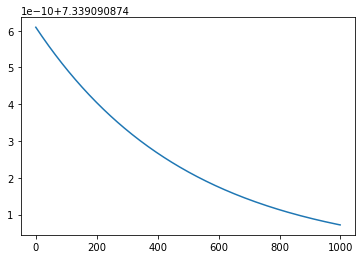

In [55]:
plt.plot(costs)